In [1]:
import torch
from torch import nn

In [ ]:
# create model class

class Model(nn.Module):

    def __init__(self, num_features) -> None:
        super().__init__()
        self.linear = nn.Linear(in_features=num_features, out_features=1) #defining a linear layer
        self.Sigmoid = nn.Sigmoid() #activation function
    
    def forward(self,features):

        out = self.linear(features) # z = xw + b
        out = self.Sigmoid(out) # activation function

        return out

__init__ Method:

This is the constructor of the Model class. It's called when an object of this class is instantiated.
num_features: This is a parameter specifying the number of input features for the model.  
`super().__init__():`Calls the constructor of the parent class (nn.Module) to initialize the base functionality.  
  
`self.linear:`
This defines a linear layer (nn.Linear) with:
in_features=num_features: Number of input features to the layer.
out_features=1: Number of output features from the layer (here, just 1).
The layer computes a linear transformation:  
$𝑧 = 𝑥𝑊^𝑇+𝑏$  
where:
x: Input features.  
W: Weight matrix (learned during training).  
b: Bias vector (also learned during training).  

`self.Sigmoid:`This defines a Sigmoid activation function. It maps input values to a range between 0 and 1. The Sigmoid function is commonly used in binary classification problems, where outputs represent probabilities.

In [ ]:
features = torch.rand([10,5])
#create an object of our Model class
model = Model(features.shape[1])

#apply forward pass on the neural network
# model.forward(tensor)
model(features)

tensor([[0.3511],
        [0.4207],
        [0.4759],
        [0.4078],
        [0.3900],
        [0.3583],
        [0.4378],
        [0.4503],
        [0.4039],
        [0.3970]], grad_fn=<SigmoidBackward0>)

In [ ]:
# show model weights.... 5 weights for 5 inputs
model.linear.weight

Parameter containing:
tensor([[ 0.2059, -0.3456, -0.2499, -0.2930,  0.0758]], requires_grad=True)

In [5]:
#show model bias..... 1 bias
model.linear.bias

Parameter containing:
tensor([0.0167], requires_grad=True)

In [6]:
!pip install torchinfo

In [ ]:
# visualize our model
from torchinfo import summary
summary(model, input_size=(10,5)) #10 rows and 5 columns

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 1]                   6
├─Sigmoid: 1-2                           [10, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

lets add a hidden layer neural network using this  
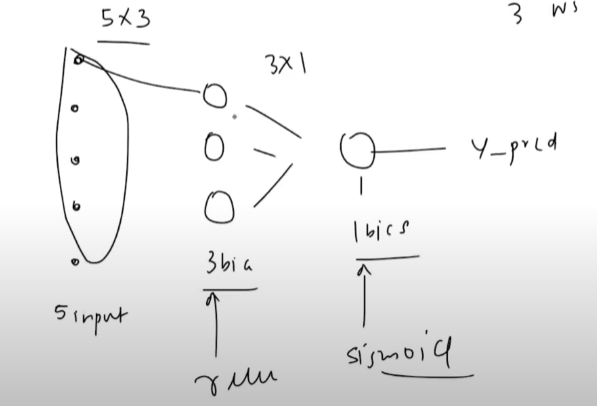

1st layer with 5 inputs and 3 outputs -> activation function : RelU  
Total Trainalbe parameters = 5 inputs x 3 outputs + 3 bias = 18 
___
2nd layer with 3 inputs and 1 outputs -> activation function : Sigmoid  
Total Trainalbe parameters = 3 inputs x 1 outputs + 1 bias = 4

In [10]:
class AdvanceModel(nn.Module):

    #defining the architecture of neural network
    def __init__(self, num_features) -> None:
        super().__init__()
        self.linear1 = nn.Linear(in_features=5, out_features=3) #defining first linear layer1
        self.relu = nn.ReLU() #RelU activation function for first layer

        self.linear2 = nn.Linear(in_features=3, out_features=1) # defining 2nd linear layer
        self.sigmoid = nn.Sigmoid() # Sigmoid activation function for 2nd layer

    def forward(self,features):

        out = self.linear1(features) # z = xw + b
        out = self.relu(out) # activation function

        out = self.linear2(out) # z = xw + b
        out = self.sigmoid(out)

        return out

In [11]:
features = torch.rand([10,5])
#create an object of our Model class
model2 = AdvanceModel(features.shape[1])

#apply forward pass on the neural network
# model.forward(tensor)
model2(features)

tensor([[0.5501],
        [0.5501],
        [0.5532],
        [0.5501],
        [0.5501],
        [0.5501],
        [0.5511],
        [0.5501],
        [0.5522],
        [0.5501]], grad_fn=<SigmoidBackward0>)

In [29]:
linear1_weight = model2.linear1.weight
linear2_weight = model2.linear2.weight
print(f'linear layer 1 has {(linear1_weight).shape} weights -> {linear1_weight}\n')
print(f'linear layer 2 has {(linear2_weight).shape} weights -> {linear2_weight}')

linear layer 1 has torch.Size([3, 5]) weights -> Parameter containing:
tensor([[ 0.0801, -0.3856, -0.1476, -0.3991,  0.4312],
        [ 0.2129, -0.4341,  0.0312, -0.3212,  0.3702],
        [ 0.4364, -0.4386, -0.2429,  0.3905, -0.1302]], requires_grad=True)

linear layer 2 has torch.Size([1, 3]) weights -> Parameter containing:
tensor([[ 0.1543,  0.1194, -0.1495]], requires_grad=True)


In [16]:
print(model2.linear1.bias, model2.linear2.bias)

Parameter containing:
tensor([-0.3563, -0.0381, -0.3418], requires_grad=True) Parameter containing:
tensor([0.2011], requires_grad=True)


In [32]:
summary(model2, input_size=(10, 5))

Layer (type:depth-idx)                   Output Shape              Param #
AdvanceModel                             [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

### A general neural network can easily contain multiple hidden layers which can be difficult to maintain as multiple varaibles and their input and output sequence is to be initialized properply
### To prevent any error we can use sequential containers from pytorch

In [33]:
class SequentialModel(nn.Module):

    #defining the architecture of neural network
    def __init__(self, num_features) -> None:
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_features=5, out_features=3),
            nn.ReLU(),
            nn.Linear(in_features=3, out_features=1),
            nn.Sigmoid() 
        )

    def forward(self,features):
        out = self.layers(features)
        return out

In [35]:
features = torch.rand([10,5])
#create an object of our Model class
model3 = SequentialModel(features.shape[1])

#apply forward pass on the neural network
# model.forward(tensor)
model2(features)

tensor([[0.5422],
        [0.4838],
        [0.5002],
        [0.5305],
        [0.5033],
        [0.5438],
        [0.5114],
        [0.5194],
        [0.5223],
        [0.5285]], grad_fn=<SigmoidBackward0>)

Working like normal but with ease

In [36]:
summary(model3, input_size=(10, 5))

Layer (type:depth-idx)                   Output Shape              Param #
SequentialModel                          [10, 1]                   --
├─Sequential: 1-1                        [10, 1]                   --
│    └─Linear: 2-1                       [10, 3]                   18
│    └─ReLU: 2-2                         [10, 3]                   --
│    └─Linear: 2-3                       [10, 1]                   4
│    └─Sigmoid: 2-4                      [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00